# LAPACK in NumPy

Yung-Yu Chen

In [1]:
# import numpy and matplotlib for fancy plotting.  Also do some settings.
import numpy as np
import pylab
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 100
%matplotlib inline

The above setup code is shown for demonstration only.  Nothing stops you from hiding it in the slides.

# Show Something

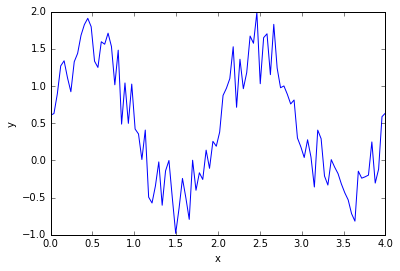

In [2]:
# let's draw a sinusoidal with some noise.
xdata = np.linspace(0, 4.0, 100)
pylab.plot(xdata,
           np.sin(xdata*np.pi)+np.random.random(xdata.shape[0]))
pylab.xlabel('x')
pylab.ylabel('y')
pylab.show()

# Singular Value Decomposition

Assume an $m \times n$ matrix $\mathrm{A}$ can be decomposed as $\mathrm{A} = \mathrm{U}\mathrm{\Sigma}\mathrm{V}^t$, where $\mathrm{U}$ is an $m\times m$ matrix, $\mathrm{\Sigma}$ is an $m\times n$ matrix, and $\mathrm{V}$ is an $n\times n$ matrix.

The matrix $\mathrm{\Sigma}$ is the diagonal matrix containing the square root of the non-zero singular values of $\mathrm{A}\mathrm{A}^t$.  The decomposition is called SVD (singular value decomposition).

For example, given a $2\times 3$ matrix $\mathrm{A} = \left(\begin{array}{ccc} -1 & 1 & 0 \\ 0 & -1 & 1 \end{array}\right)$, the singular value decomposition can be done by

In [3]:
A = np.array([[-1, 1, 0], [0, -1, 1]], dtype='float64')
U, Sigma, V = np.linalg.svd(A)
print('U =', U)
print('Sigma =', Sigma)
print('V =', V)

U = [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
Sigma = [ 1.73205081  1.        ]
V = [[  4.08248290e-01  -8.16496581e-01   4.08248290e-01]
 [ -7.07106781e-01  -2.78976253e-16   7.07106781e-01]
 [  5.77350269e-01   5.77350269e-01   5.77350269e-01]]


We can write a function to take only a number of significant singular values and eigenvectors and reconstruct the image.

In [4]:
def compress(arr, nsv):
    """Use SVD to demonstrate image compression.
    
    :param arr: Input color image.
    :param nsv: Number of wanted singular values.
    :return: New image.
    """
    # create a buffer array for return.
    newarr = np.empty_like(arr)
    # determine the wanted rank.
    rank = min(arr.shape[0], arr.shape[1])
    rank = min(nsv, rank)
    # iterate R, G, B.
    for iv in range(arr.shape[-1]):
        # compute SVD.
        U, Sigma, V = np.linalg.svd(arr[:,:,iv])
        # pick only wanted singular values.
        S = np.diag(Sigma[:rank])
        U = U[:, :rank]
        V = V[:rank, :]
        # reconstruct image for each of R, G, B.
        newarr[:,:,iv] = np.dot(np.dot(U, S), V)
    return newarr

A popular application of SVD is image processing.  Let's use a 960 pixel by 720 pixel image, and compress it using 10 singular values:

The image is 960 px by 720 px


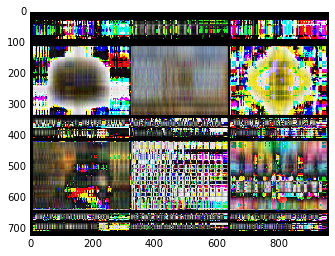

In [5]:
pix = pylab.imread("whatispython.png")
print("The image is %d px by %d px" % (pix.shape[1], pix.shape[0]))
pylab.imshow(compress(pix, 10))

Let's try with 100 (of 720) singular values.  We can see something like a turtle, a building, a sign, and several people in some of the blocks.  There is still much noise.

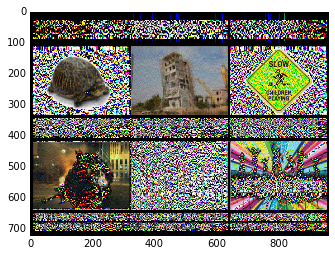

In [6]:
pylab.imshow(compress(pix, 100))

We further add to 300 (of the 720) singular values.  Now it's pretty clear what the image is!

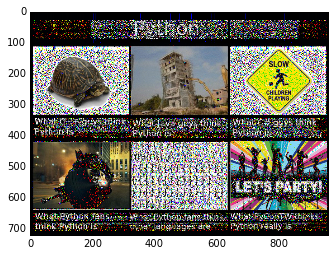

In [7]:
pylab.imshow(compress(pix, 300))

# Related Links

- A really cool slide: http://b81.org/s/from_star.html#/
- Python official web site: https://www.python.org/
- Learn Python the Hard Way (self-learning materials for experienced programmers): http://learnpythonthehardway.org/

![](files/whatispython.png)